# Mall Customers Segmentation

## Abstract

The mall owner, through membership cards, has some basic customer data such as customer ID, age, gender, annual income and spending score. 
The spending score is what is assigned to the customer based on certain parameters such as customer behavior and purchasing data.

The mall owner wants to understand which customers are easy to approach (target customers) so he can communicate this to the marketing team and plan an appropriate strategy.

## Main Objective of the Analysis

The main objective of the analysis is to create an unsupervised learning model using clustering approach that can identify various customer segments and help the marketing team develop an appropriate marketing strategy for each customer segment.

## Brief Description of the Data

The dataset was taken from [Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) and it contains the 200 observations of mall customers and 5 features as follows:

| Column | Description |
| --- | --- |
| CustomerID |  Unique ID assigned to the customer |
| Gender |  Gender of the customer |
| Age |  Age of the customer |
| Annual Income (k$) | Annual Income of the customer |
| Spending Score (1-100) | Score assigned by the mall based on customer behavior and spending nature |

## Project Workflow:
1. Importing Libraries
2. Loading the Datasets
3. Data Summary
4. Exploratory Data Analysis
  - Perform data cleaning: drop unnecessary features
  - Provide the summary statistics of the features
  - Analyze and visualize feature distribution
5. Cluster Modeling
  - Define the features that will take part in clustering
  - Use 4 clustering algorithms:
    - K-Means
    - Hierarchical Agglomerative Clustering
    - DBSCAN
    - Mean Shift
  - Clustering Model Evaluation
  - Conclusion

## 1. Importing Libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fast')

import seaborn as sns
sns.set(style='darkgrid', context='notebook', palette='tab10')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

import warnings as wn
wn.filterwarnings('ignore')

## 2. Loading the Data

In [2]:
data = pd.read_csv('Mall_Customers.csv')

## 3. Data Summary

In [3]:
# Examine the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Check for the null values in dataset
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 4. Exploratory Data Analysis

### Data Cleaning

In [5]:
# Drop unnecessary columns
data.drop(['CustomerID'], axis=1, inplace=True)

### Summary Statistics

In [6]:
# Examine the summary statistics of the numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


### Feature Distribution

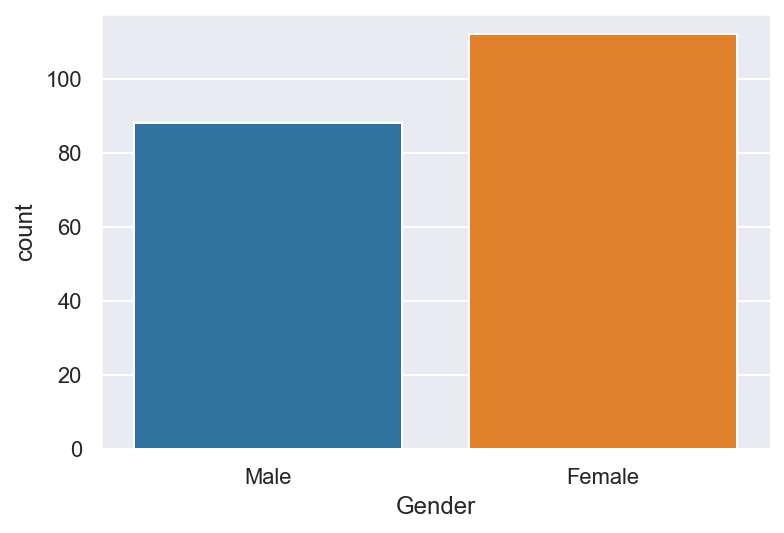

In [7]:
sns.countplot(x='Gender', data=data);

In [8]:
data['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [9]:
data.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


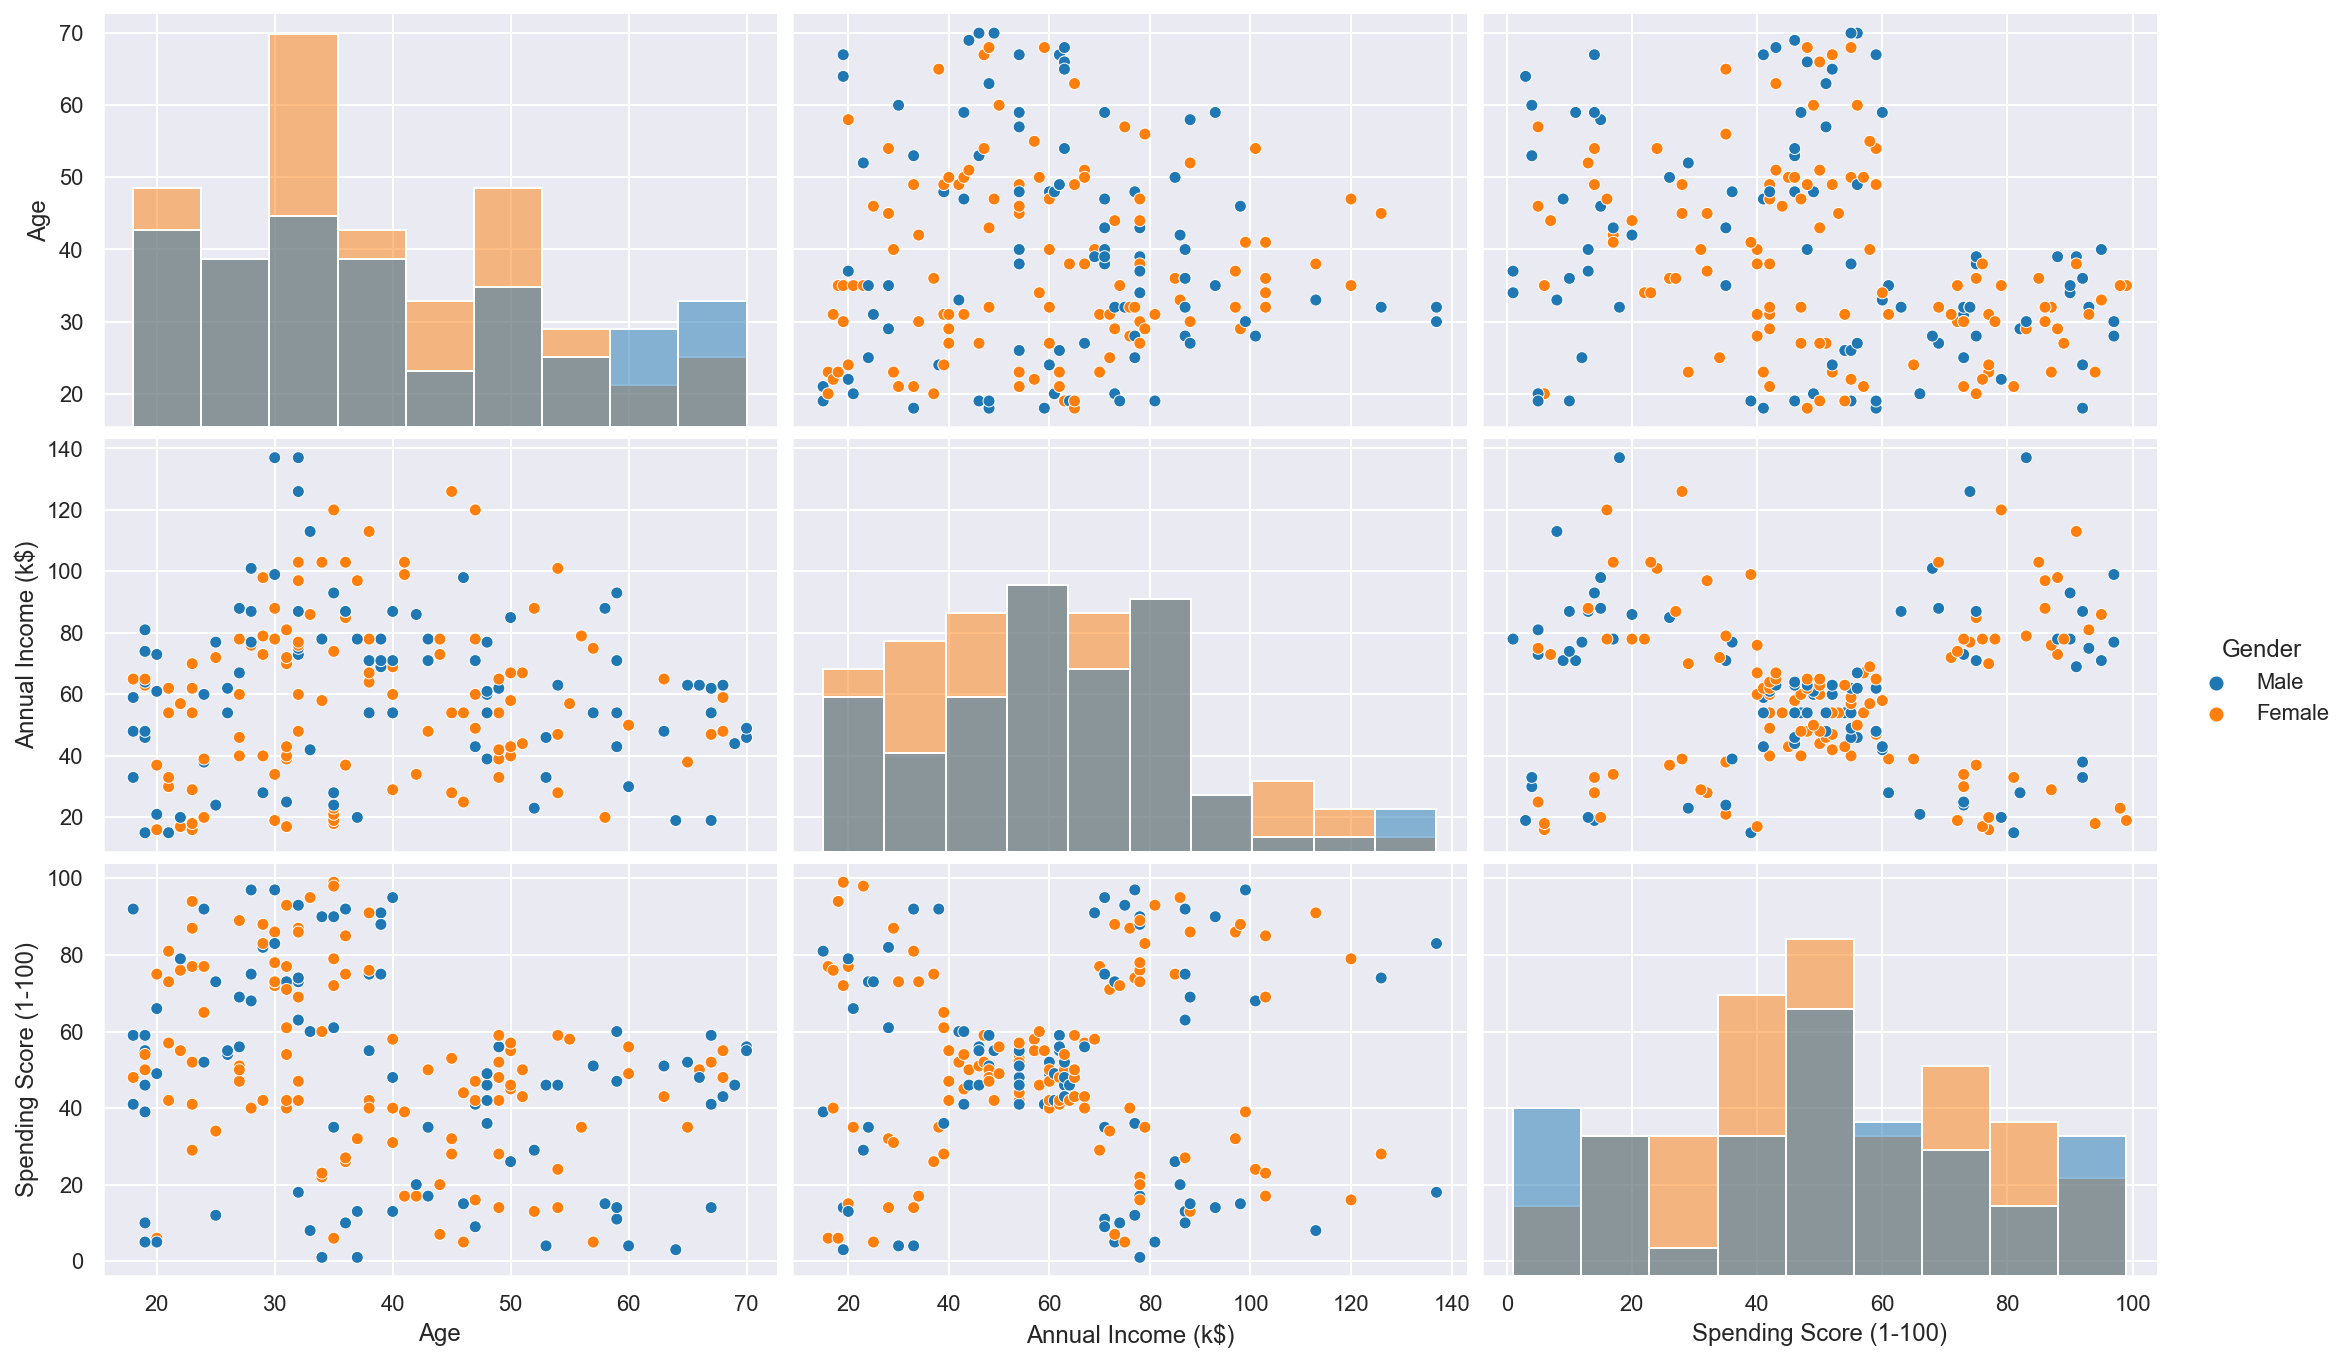

In [10]:
sns.pairplot(data=data, hue='Gender', diag_kind='hist', height=3.2, aspect=1.6);

## 5. Cluster Modeling

### Feature Definition

In [11]:
X = data.drop(['Gender', 'Age'], axis=1)
x_ax = data['Annual Income (k$)']
y_ax = data['Spending Score (1-100)']

### K-Means

In [12]:
inertia = []
scores = []
ks = list(range(2, 11))

for k in ks:
    km = KMeans(n_clusters=k).fit(X)
    inertia.append(km.inertia_)
    scores.append(silhouette_score(X, km.labels_))

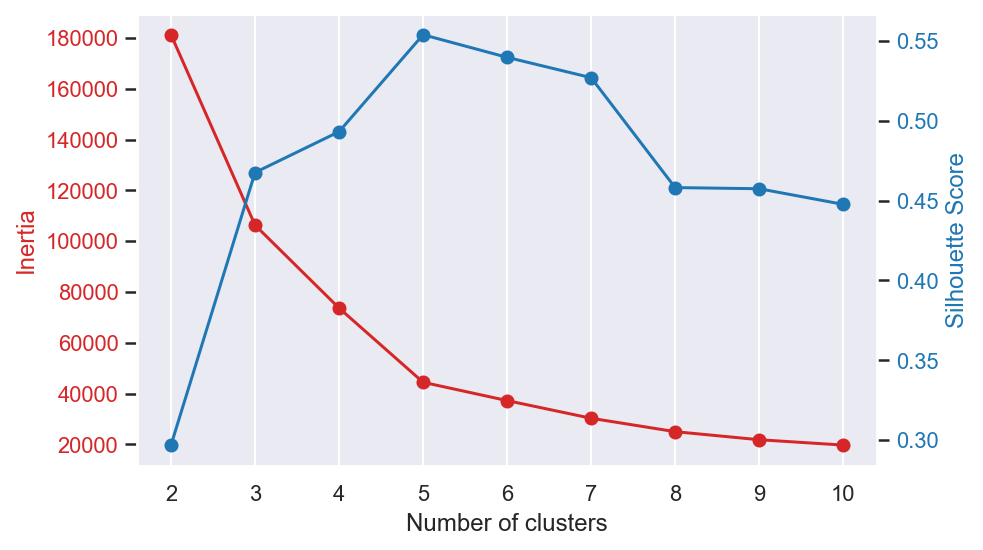

In [13]:
# Find the appropriate number of clusters
fig, ax1 = plt.subplots(figsize=(7, 4))

color='tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(ks, inertia, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color, grid_alpha=0)

ax2 = ax1.twinx()

color='tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(ks, scores, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color, grid_alpha=0)

plt.tight_layout(pad=1.2)
plt.show();

In [14]:
km = KMeans(n_clusters=5).fit(X)
data['K-Means'] = km.labels_

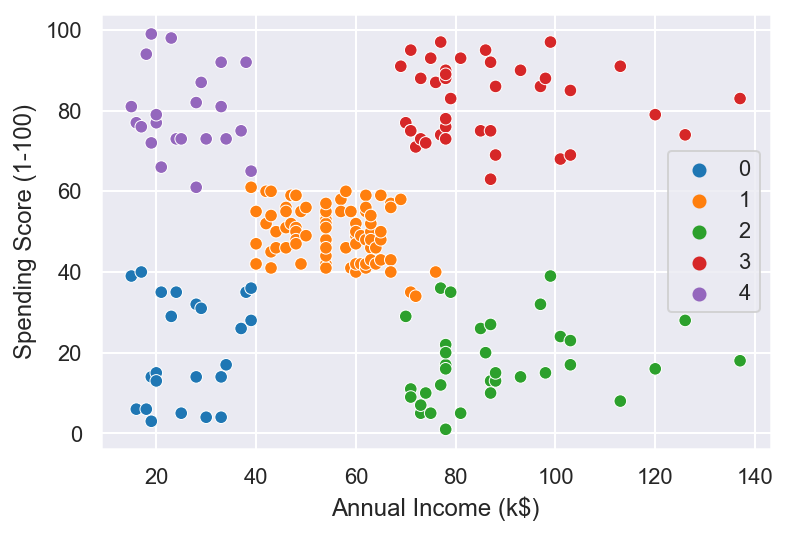

In [15]:
sns.scatterplot(x_ax, y_ax, hue=km.labels_, palette='tab10', s=40);

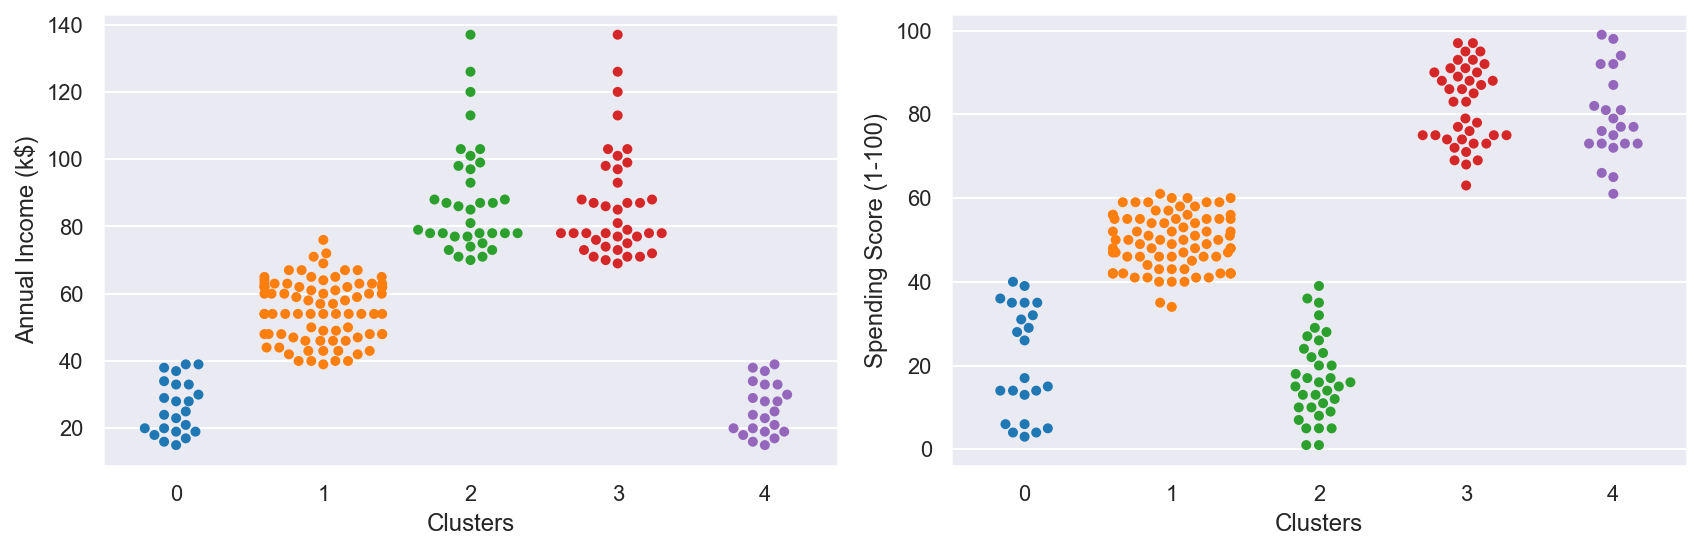

In [16]:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(121)
sns.swarmplot(km.labels_, x_ax, ax=ax1).set_xlabel('Clusters')

ax2 = fig.add_subplot(122)
sns.swarmplot(km.labels_, y_ax, ax=ax2).set_xlabel('Clusters')

plt.tight_layout(pad=1.2)
plt.show()

K-Means algorithm generated the following 5 clusters:

- Customers with low annual income and high spending score
- Customers with low annual income and low spending score
- Customers with medium annual income and medium spending score
- Customers with high annual income and low spending score
- Customers with high annual income and high spending score


### Hierarchical Agglomerative Clustering

In [17]:
agg = AgglomerativeClustering(n_clusters=5, linkage='ward', compute_full_tree=True).fit(X)
data['Agglomerative'] = agg.labels_

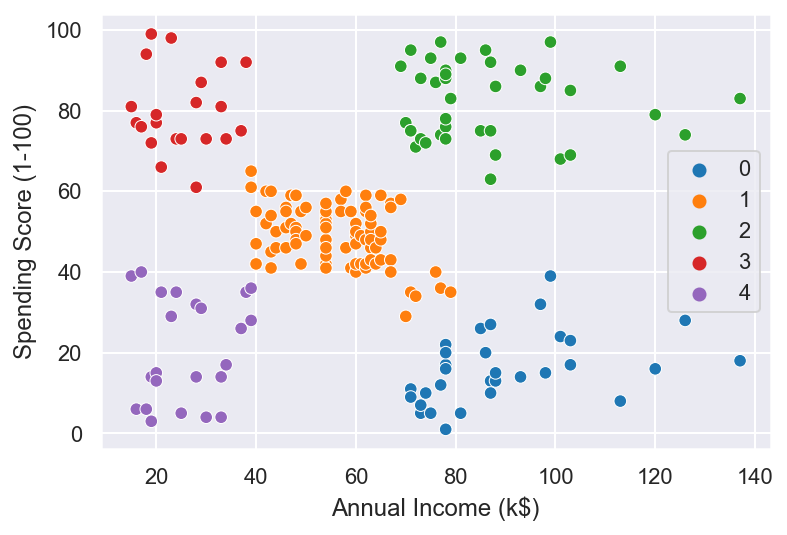

In [18]:
sns.scatterplot(x_ax, y_ax, hue=agg.labels_, palette='tab10', s=40);

### DBSCAN

In [19]:
db = DBSCAN(eps=10, min_samples=7).fit(X)
data['DBSCAN'] = db.labels_

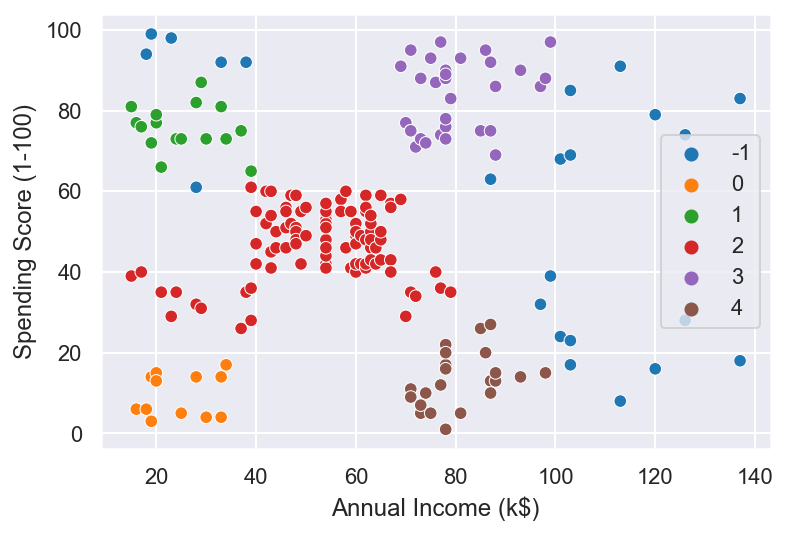

In [20]:
sns.scatterplot(x_ax, y_ax, hue=db.labels_, palette='tab10', s=40);

### Mean Shift

In [21]:
bandwidth = estimate_bandwidth(X, quantile=0.18)
ms = MeanShift(bandwidth).fit(X)
data['Mean Shift'] = ms.labels_

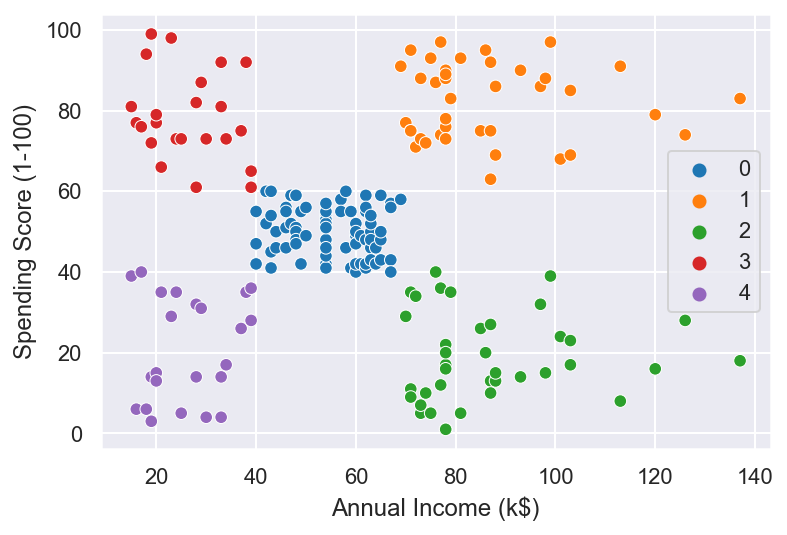

In [22]:
sns.scatterplot(x_ax, y_ax, hue=ms.labels_, palette='tab10', s=40);

### Clustering Model Evaluation

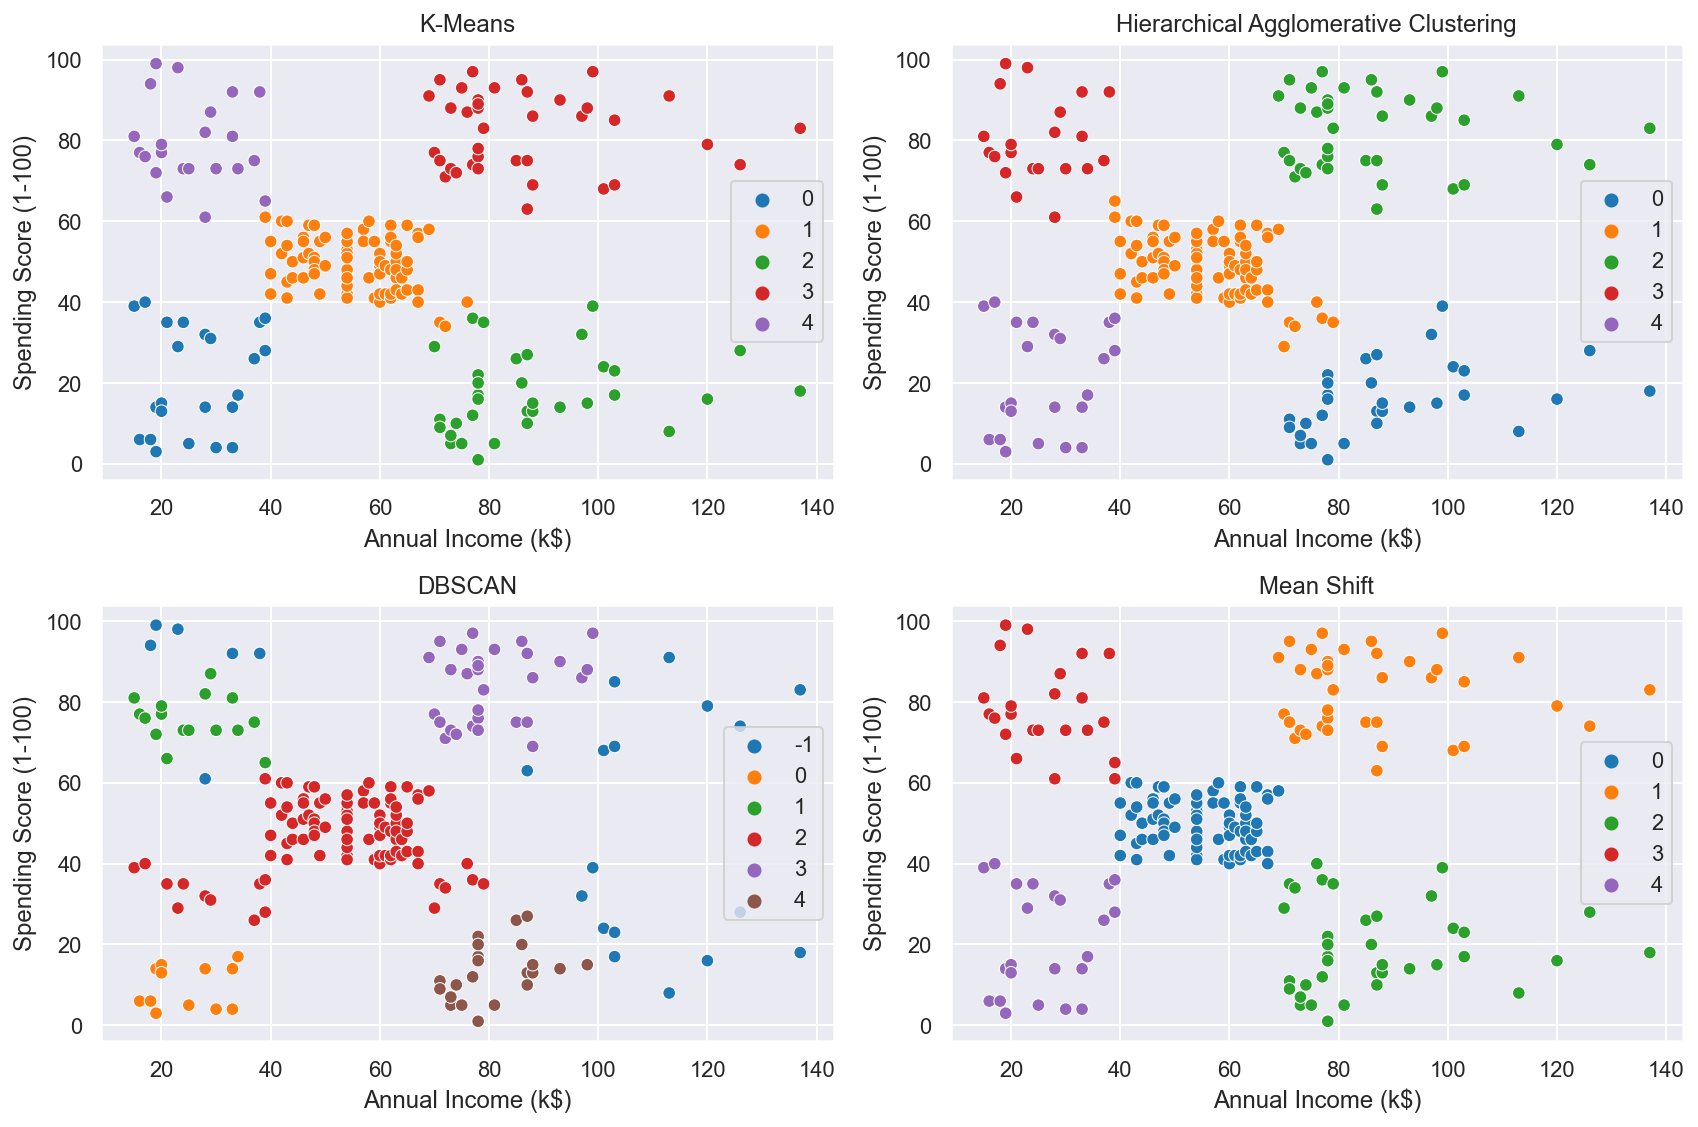

In [23]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(221)
ax1.set_title('K-Means')
sns.scatterplot(x_ax, y_ax, hue=km.labels_, palette='tab10', s=40, ax=ax1);

ax2 = fig.add_subplot(222)
ax2.set_title('Hierarchical Agglomerative Clustering')
sns.scatterplot(x_ax, y_ax, hue=agg.labels_, palette='tab10', s=40, ax=ax2);

ax3 = fig.add_subplot(223)
ax3.set_title('DBSCAN')
sns.scatterplot(x_ax, y_ax, hue=db.labels_, palette='tab10', s=40, ax=ax3);

ax4 = fig.add_subplot(224)
ax4.set_title('Mean Shift')
sns.scatterplot(x_ax, y_ax, hue=ms.labels_, palette='tab10', s=40, ax=ax4);

plt.tight_layout(pad=1.2)
plt.show()

In [24]:
data.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),K-Means,Agglomerative,DBSCAN,Mean Shift
26,Female,45,28,32,0,4,2,4
130,Male,47,71,9,2,0,4,2
135,Female,29,73,88,3,2,3,1
19,Female,35,23,98,4,3,-1,3
66,Female,43,48,50,1,1,2,0
60,Male,70,46,56,1,1,2,0
115,Female,19,65,50,1,1,2,0
36,Female,42,34,17,0,4,0,4
53,Male,59,43,60,1,1,2,0
95,Male,24,60,52,1,1,2,0


### Conclusion
- For a more accurate customer segmentation, it is not enough just to select an appropriate clustering algorithm. It is also important to understand which features to use, which patterns they form, and how those patterns can be interpreted.
- It is recommended to use only numerical features in cluster models, and it is strongly not recommended to use categorical features, encoding them into numerical ones.
- From the above evaluation, it is clear that DBSCAN failed to generate reasonable clusters. It is due to its problems in recognising clusters of various densities (which are present in this case).
- In turn, K-Means, Hierarchical Agglomerative Clustering and Mean Shift algorithms created reasonable clusters.
- The best clustering algorithm in this case is Mean Shift, which provides a clear customer segmentation. 
